In [121]:
# titanic challenge 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [122]:
data_titanic = pd.read_csv("/home/abu/Downloads/titanic/train.csv") # read the data. 

data_titanic_test = pd.read_csv("/home/abu/Downloads/titanic/test.csv")

data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/abu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


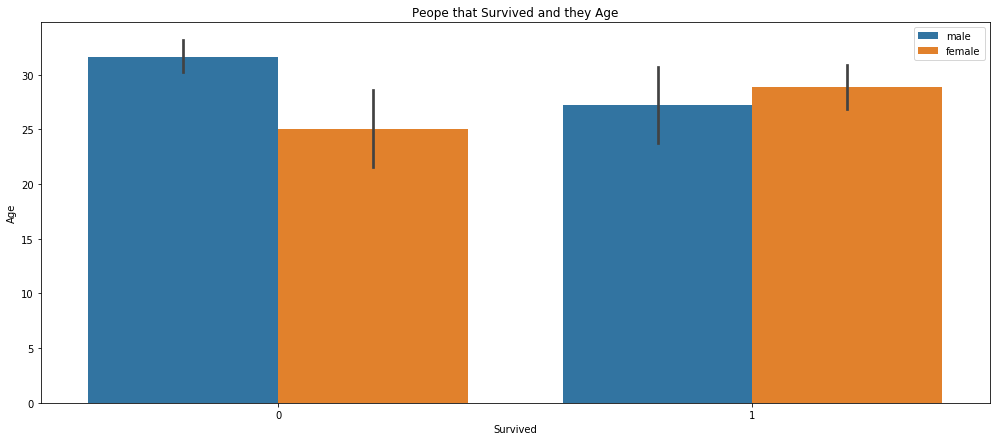

In [123]:
#lets visualize the dataset

plt.figure(figsize=(17,7))

sns.barplot(x="Survived",y="Age", hue="Sex", data=data_titanic)

plt.title("Peope that Survived and they Age")
plt.legend()

No handles with labels found to put in legend.


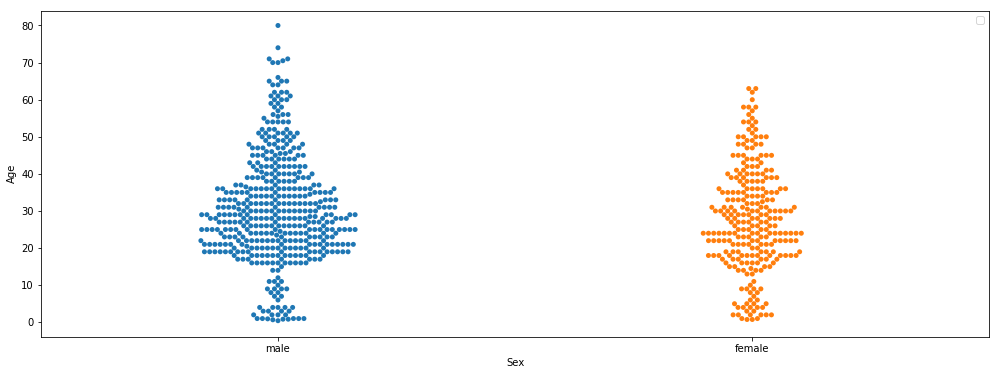

In [124]:
# lets visualize the amount of males and females by age

plt.figure(figsize=(17,6))
sns.swarmplot(x='Sex',y='Age', data=data_titanic)
plt.legend()

In [125]:
#going to drop columns that are uselesss
drop_these = data_titanic[["Ticket", "Name", "Embarked"]]

In [126]:
# some preprocessing before we feed the data into the model
# first I'm going to drop features I dont need
def drop_features(df_train,df_test):
    return df_train.drop(['Ticket', 'Name', 'Embarked'],axis=1),df_test.drop(['Ticket', 'Name', 'Embarked'],axis=1)

data_train_titanic,data_test_titanic = drop_features(data_titanic,data_titanic_test)

In [127]:
data_train_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


In [128]:
data_train_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin'],
      dtype='object')

In [129]:
#encode the data to feed to model 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

encode = LabelEncoder()
onehot = OneHotEncoder()


data_train_titanic["Sex"] = encode.fit_transform(data_train_titanic["Sex"])
data_train_titanic["Cabin"] = encode.fit_transform(data_train_titanic["Cabin"].astype(str))



In [130]:
data_train_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.0,1,0,7.2500,147
1,2,1,1,0,38.0,1,0,71.2833,81
2,3,1,3,0,26.0,0,0,7.9250,147
3,4,1,1,0,35.0,1,0,53.1000,55
4,5,0,3,1,35.0,0,0,8.0500,147


In [131]:
#
y= data_train_titanic.Survived

X = data_train_titanic.drop(columns=["Survived"],axis=1)

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_valid,y_train, y_valid = train_test_split(X,y,test_size=0.25)

In [93]:
# impute the missing values with Imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))

#Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [109]:
#build the models and measure they accuracy
# plit the data and measuring accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix



#the models
# Our Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [107]:
def get_model(model,X_train,X_valid,y_train ,y_valid):
    """
    gets a model, for example a RandomForest or a XGBoost etc
    performs training
    measures accuracy 
    shows the confusion matrix
    """
    
    model.fit(X_train,y_train)
    predictions = model.predict(X_valid)
    print(model)
    
    print("Accuracy score : ", accuracy_score(predictions,y_valid))
    print("mae score : ", mean_absolute_error(predictions,y_valid))
    print("Recall score   : ", recall_score(predictions,y_valid))
    print("classification report :\n",classification_report(predictions,y_valid))
    
    
    # this the confusion matrix
    confusion = confusion_matrix(y_valid, predictions)
    sns.heatmap(confusion, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value');
    return None

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Accuracy score :  0.7623318385650224
mae score :  0.23766816143497757
Recall score   :  0.6511627906976745
classification report :
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       137
         1.0       0.71      0.65      0.68        86

   micro avg       0.76      0.76      0.76       223
   macro avg       0.75      0.74      0.75       223
weighted avg       0.76      0.76      0.76       223



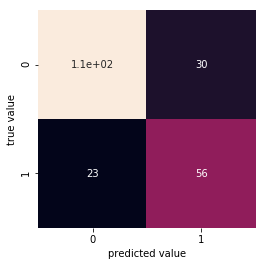

In [111]:
# build the first model
# the Decision Tree Regressor

tree = DecisionTreeRegressor(random_state=0)
get_model(tree,imputed_X_train,imputed_X_valid,y_train,y_valid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Accuracy score :  0.7982062780269058
mae score :  0.20179372197309417
Recall score   :  0.7575757575757576
classification report :
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       157
           1       0.63      0.76      0.69        66

   micro avg       0.80      0.80      0.80       223
   macro avg       0.76      0.79      0.77       223
weighted avg       0.81      0.80      0.80       223



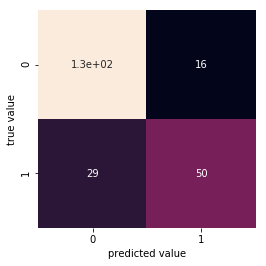

In [113]:
#build the second model 
# Random Forest

random = RandomForestClassifier(n_estimators=10,random_state=0)
get_model(random,imputed_X_train,imputed_X_valid,y_train,y_valid)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy score :  0.8251121076233184
mae score :  0.17488789237668162
Recall score   :  0.8571428571428571
classification report :
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       167
           1       0.61      0.86      0.71        56

   micro avg       0.83      0.83      0.83       223
   macro avg       0.78      0.84      0.79       223
weighted avg       0.86      0.83      0.83       223



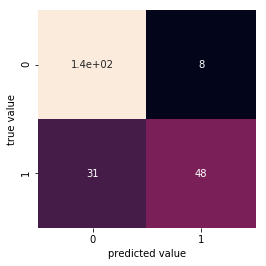

In [120]:
#build with the third model
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, n_jobs=2)

get_model(xgb,imputed_X_train,imputed_X_valid,y_train,y_valid)